In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pathlib
from matplotlib.lines import Line2D
from PIL import Image

%matplotlib inline

In [2]:
_METRICS_FILE = './files/benchmark'
_METRIC = 'accuracy'
_MODELS = ['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv']

directory = './files/keras/'+_METRIC+'/'

In [3]:
try:
    #read csv file
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except OSError as err:
    # if there is no csv file we read the excel file
    excel_file = pd.read_excel(_METRICS_FILE+'.xlsx')
    # transform the excel file in a csv file
    excel_file.to_csv(_METRICS_FILE+'.csv', index=False)
    # read the new csv file 
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except:
    print("ERROR WHILE READING METRICS FILE")

metrics['total_time_s'] = metrics.apply(lambda row: row['train_time_s']+row['test_time_s'], axis=1)
metrics.sample(5)

,dataset,classifier,total,tp,tn,fp,fn,precision,recall,f1,fbeta,accuracy,train_time_s,test_time_s,total_time_s
162,DistalPhalanxOutlineAgeGroup,MOA_RandomHoeffdingTree,539.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.761162,0.001038,0.000110,0.001147
499,HandOutlines,MOA_HoeffdingTree,1370.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.714001,0.367639,0.268752,0.636391
1814,electricity,MOA_SGD,45312.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.575033,0.005631,0.002641,0.008272
1646,Yoga,keras_3_Dilated_Conv,3300.0,4.034483,4.868966,0.506897,0.589655,0.889867,0.872701,0.890267,0.867699,0.890345,259.465874,0.461536,259.927411
1229,SonyAIBORobotSurface2,MOA_OzaBag,980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.788095,0.045945,0.043861,0.089806


In [4]:
metrics_total = metrics[metrics.classifier.isin(_MODELS) ][['classifier','total',_METRIC]]
metrics_total_keras = metrics_total.sort_values(by=['total'])
metrics_total_keras = metrics_total_keras[metrics_total_keras['classifier']=='keras_3_Dilated_Conv']
#metrics_total_keras = metrics_total_keras.pivot(columns='classifier', values = ['total', _METRIC])
metrics_total_keras.head(20)    
metrics_total_keras_p = metrics_total.sort_values(by=['total'])
metrics_total_keras_p = metrics_total_keras_p[metrics_total_keras_p['classifier']=='keras_parallel_3_Dilated_Conv']
#metrics_total_keras_p = metrics_total_keras_p.pivot(columns='classifier', values = ['total', _METRIC])
metrics_total_keras_p.head(20)


,classifier,total,accuracy
922,keras_parallel_3_Dilated_Conv,432.0,0.550000
313,keras_parallel_3_Dilated_Conv,451.0,0.716667
545,keras_parallel_3_Dilated_Conv,453.0,0.322222
139,keras_parallel_3_Dilated_Conv,490.0,0.655556
168,keras_parallel_3_Dilated_Conv,529.0,0.768376
226,keras_parallel_3_Dilated_Conv,529.0,0.680342
806,keras_parallel_3_Dilated_Conv,543.0,0.593333
748,keras_parallel_3_Dilated_Conv,544.0,0.700000
1386,keras_parallel_3_Dilated_Conv,590.0,0.947368
1009,keras_parallel_3_Dilated_Conv,595.0,0.790000


<Figure size 432x288 with 0 Axes>

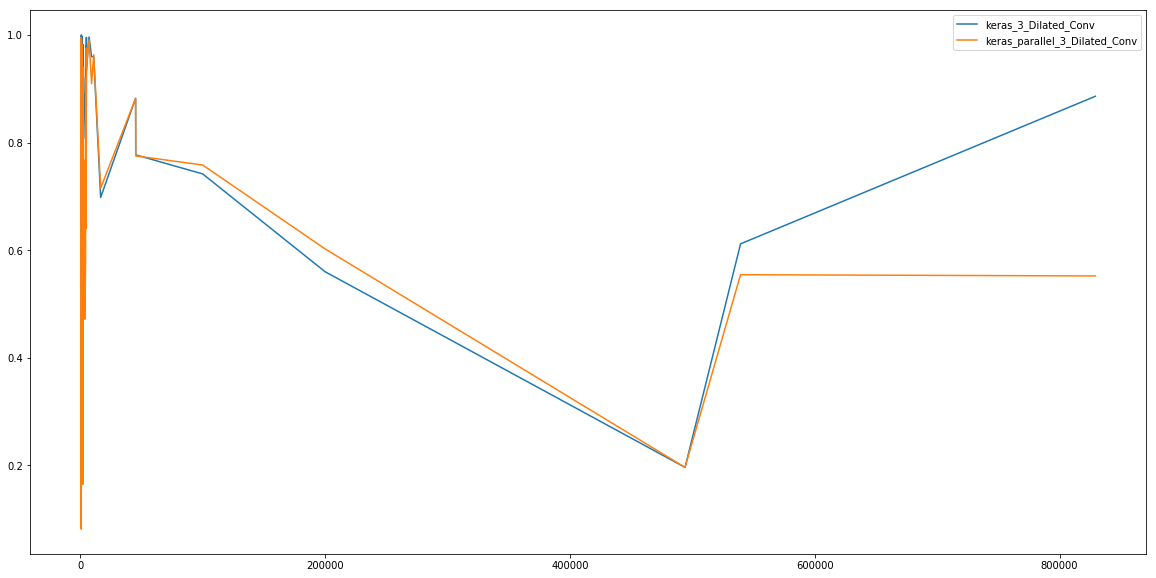

In [5]:
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.plot(metrics_total_keras['total'], metrics_total_keras[_METRIC], label='keras_3_Dilated_Conv')
plt.plot(metrics_total_keras_p['total'], metrics_total_keras_p[_METRIC], label='keras_parallel_3_Dilated_Conv')
plt.legend(loc='best')

plt.show()